# Ag-Analytics® BoundaryAI API Demo

Common Land Unit (CLU) boundaries are farm/field boundaries used by United States Department of Agriculture (USDA) in the delivery of certain farm programs. This API consists of a GET request where the user can pass an extent (bounding box) and retrieve field boundaries in geojson or json format. The API will also plot, visualize, and display the CLU boundaries to the corresponding bounding box, using Geopandas and Matplotlib.

## GET Request

In [13]:
#Import packages
import requests
import json
import time
from pandas.io.json import json_normalize
import requests, zipfile, io
%matplotlib inline
%autosave 0

Autosave disabled


### API Details

#### Request URL:https://ag-analytics.azure-api.net/CommonLandUnitBoundary/get?geometry={geometry}
#### Request parameters:

***geometry - *** string - The geometry to apply as the spatial filter.
The structure of the geometry is the same as the structure of the json/geojson

***f - ***  string(geojson/json)

In order to get Ocp-Apim-Subscription-Key, please click on this link https://analytics.ag/Session/SignInToAPIPayment

In [14]:
geometry={"xmin":-88,"ymin":40.2,"xmax":-88.126,"ymax":40.22,"spatialReference":{"wkid":4326}}
f="geojson"
headers={'Ocp-Apim-Subscription-Key': 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxx'}

### API Function

In [15]:
def get_reverse_geocode_data(geometry,f,headers):
    try:
        url = 'https://ag-analytics.azure-api.net/CommonLandUnitBoundary/get?geometry={}&f={}'.format(geometry,f)
        
        
        
        response = (requests.get(url,headers=headers).text)
      
                
        print(response)

        
        response_json = json.dumps(response)
        time.sleep(0.5)
        return response_json
    
    except Exception as e:
        raise e

### Calling API and Displaying API Response

In [16]:
clu=get_reverse_geocode_data(geometry,f,headers)

{"type":"FeatureCollection","crs":{"type":"name","properties":{"name":"EPSG:4326"}},"features":[{"type":"Feature","id":4166426,"geometry":{"type":"Polygon","coordinates":[[[-87.999262,40.215053],[-88.000416,40.215065],[-88.000478,40.215522],[-88.002138,40.215507],[-88.004019,40.215491],[-88.004019,40.215468],[-88.004017,40.215295],[-88.003971,40.208251],[-88.003971,40.208226],[-87.999479,40.208256],[-87.999234,40.208255],[-87.999234,40.208273],[-87.999249,40.212329],[-87.999247,40.214766],[-87.999262,40.215053]]]},"properties":{"OBJECTID":4166426,"CALCACRES":79.309997559999999,"CALCACRES2":null}},{"type":"Feature","id":4166427,"geometry":{"type":"Polygon","coordinates":[[[-88.000478,40.215522],[-88.000416,40.215065],[-87.999262,40.215053],[-87.999286,40.215498],[-87.999288,40.215532],[-88.000478,40.215522]]]},"properties":{"OBJECTID":4166427,"CALCACRES":1.27999997,"CALCACRES2":null}},{"type":"Feature","id":4166428,"geometry":{"type":"Polygon","coordinates":[[[-88.003971,40.208226],[-88

In [17]:
# Converting geojson response to shapefile

def post_converttoshapefile(requestbody):
    try:
        url = "https://ogre.adc4gis.com/convertJson"
     
        response = (requests.post(url,data=requestbody))
        print(response)
        
        z = zipfile.ZipFile(io.BytesIO(response.content))
        z.extractall("./shapefiles/")
        
        time.sleep(0.5)
        return response
    
    except Exception as e:
        raise e

## Displaying Output Map

### Python Packages and Dependencies
Please verify installation of 'geopandas' to ensure correct visualization capabilities.

In [18]:
#Import mapping packages
import geopandas as gpd
%matplotlib inline

### Display API Response Visualization

<Response [200]>


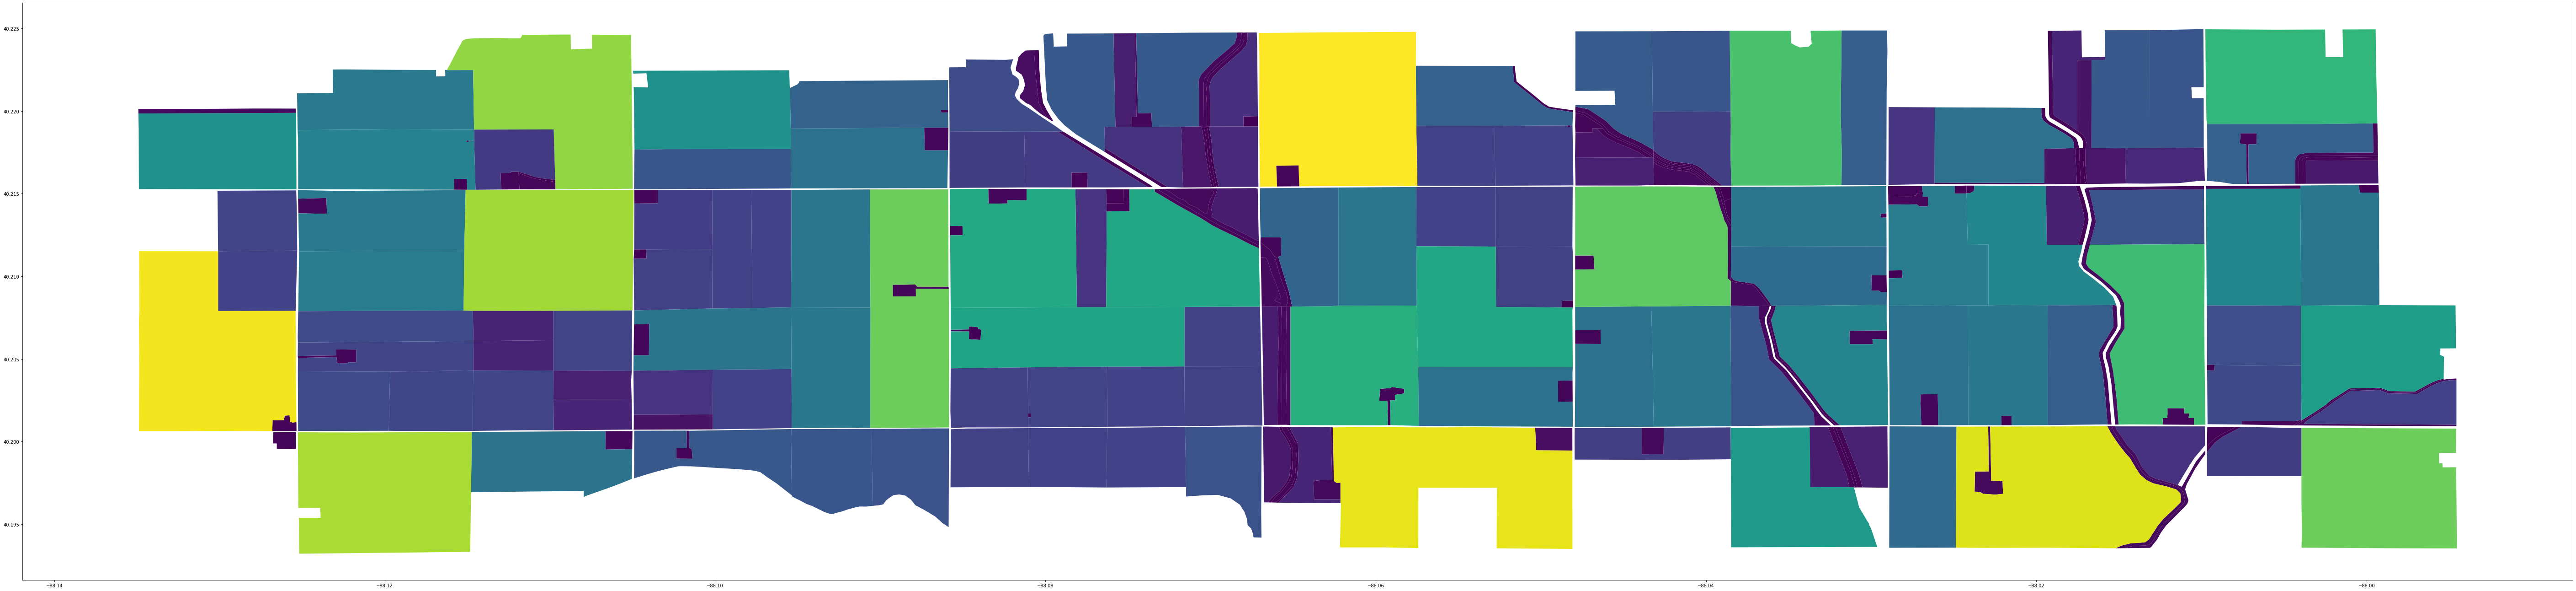

In [19]:
requestbody={'json':clu,'skipFailures':"on","destination":"C://Users"}

# Function to generate shapefiles from geojson
post_converttoshapefile(requestbody)


# reading shapefile and plotting
gdf = gpd.read_file('./shapefiles/OGRGeoJSON.shp')

gdf.plot(column='CALCACRES', cmap=None,figsize=(100, 100))